Q) Will the AND-1 riboswitch cleave itself	when both of its OBS are bound?
A) Yes, but only both
Q) Will the OR-1 riboswitch cleave	itself	when neither of its OBS are bound?
A)No only when one is bound
Q) What behavior do we	expect from	the	YES-1 riboswitch?
A)In presense of effector DNA YES-1 will cleave

DNA sequences from paper https://www.nature.com/articles/nbt1155

YES-1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
NOT-1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
AND-1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
OR-1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC

Riboswitch table in SQL:

In [1]:
import sqlite3

conn = sqlite3.connect("riboswitches")
cursor = conn.cursor()

cursor.execute("""CREATE TABLE riboswitches (id INT, name TEXT, StartEndObs1 TEXT, StartEndObs2 TEXT, StartEndRed1 TEXT, StartEndRed2 TEXT);""")
riboswitches = [(1, 'YES-1', '26-47', '', '49-54', '16-19'), 
                (2, 'NOT-1', '44-66', '', '40-43', '74-77'),
                (3, 'AND-1', '30-45', '49-64', '16-23', '70-77'), 
                (4, 'OR-1', '49-54', '16-19', '27-46', '47-66')]
cursor.executemany("""INSERT INTO riboswitches VALUES (?, ?, ?, ?, ?, ?);""", riboswitches)
conn.commit()

Testing subprocess:

In [8]:
import subprocess

seqs = """>YES-1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"""

p = subprocess.run(['C:/Users/Ryan/Desktop/muscle3.8.31_i86win32.exe', '-diags'], input=bytes(seqs, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE)

print(p.stderr.decode())
print(p.stdout.decode())


MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

- 1 seqs, max length 80, avg  length 80

>YES-1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACG
GUGAAAGCCGUAGGUUGCCC



Great! Had some problems with the path to muscle but all works now 
(FIXED, wasn't in path -> (note to self investigate where the muscle.exe should be so I can call it w/o a path))

Now to test rnaFold:

In terminal:

Microsoft Windows [Version 10.0.17134.285]
(c) 2018 Microsoft Corporation. All rights reserved.

C:\Users\Ryan>RNAfold

Input string (upper or lower case); @ to quit
....,....1....,....2....,....3....,....4....,....5....,....6....,....7....,....8
agtcgagctagcatgctagctagcagcagcgtagcatgctacgagtcagctagctgatcatcgacaggtcgatcagcatctatgcgactatctatctttgcgactaacggaactatattgccgactagagcgagagctactagcgagcagcgatcatcatcagctacacgaagaaaa
length = 177

agucgagcuagcaugcuagcuagcagcagcguagcaugcuacgagucagcuagcugaucaucgacaggucgaucagcaucuaugcgacuaucuaucuuugcgacuaacggaacuauauugccgacuagagcgagagcuacuagcgagcagcgaucaucaucagcuacacgaagaaaa
(((((((((((((((((((((......))).))))))))).......)))).((((((((((....))).))))))).......))))).....((((((.(.................((((.(((((((....))).)))))).))((((((....))).))).).))))))...
 minimum free energy = -54.20 kcal/mol

Input string (upper or lower case); @ to quit
....,....1....,....2....,....3....,....4....,....5....,....6....,....7....,....8
@

Accessing RNAfold through subprocess:

In [13]:
import subprocess

seqs = """>YES-1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>NOT-1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
>AND-1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
>OR-1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"""

p = subprocess.run('C:\Program Files (x86)\ViennaRNA Package\RNAfold.exe', input=bytes(seqs, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE)

print(p.stderr.decode())
print(p.stdout.decode())


>YES-1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)
>NOT-1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)
>AND-1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)
>OR-1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).)))))))) (-40.00)



I've never worked with .ps files and was unable to find any solutions to scaling my plots, consequently they all look like this and are useless. After about 30 minutes searching for a solution I decided my time was better spent finishing other parts of the lab.

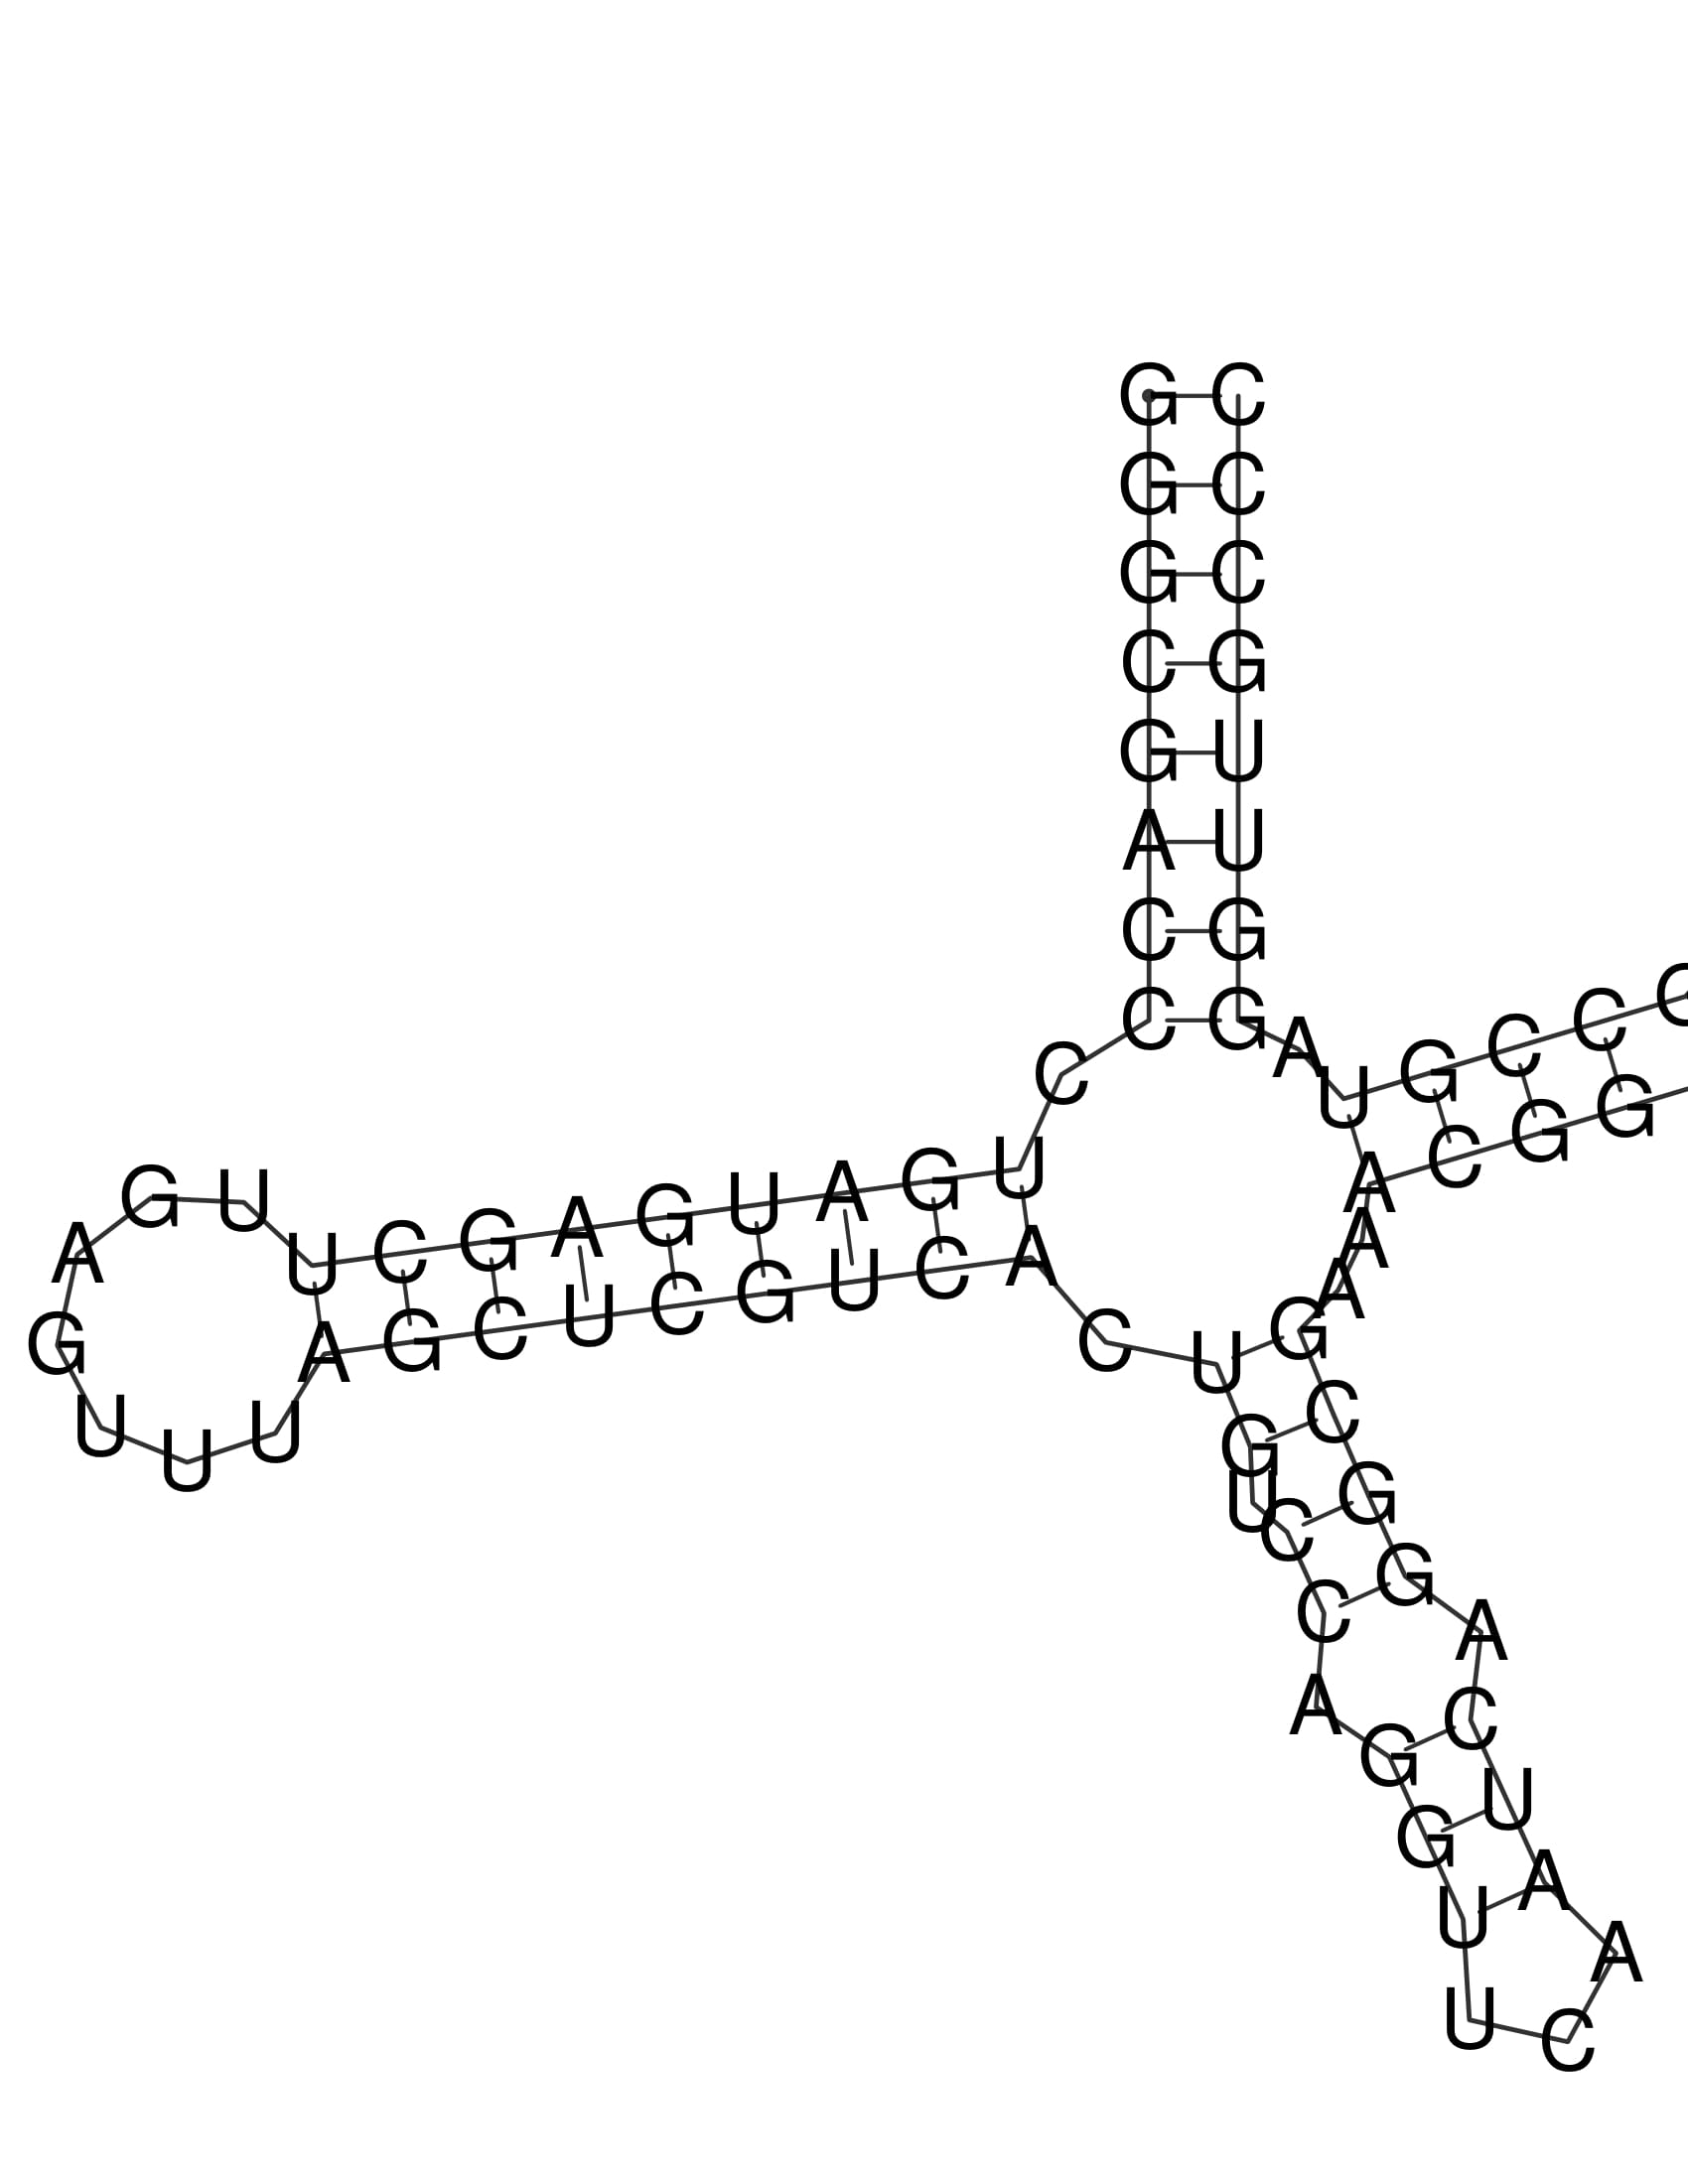

Adding OBS constraints

In [ ]:
import subprocess

seqs = """>YES-1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
"""

p = subprocess.run(['C:\Program Files (x86)\ViennaRNA Package\RNAfold.exe', '-C C:\Users\Ryan\BioE 131 Lab\Lab 5\YES-1_contraints.txt'], input=bytes(seqs, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE)

print(p.stderr.decode())
print(p.stdout.decode())